In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [3]:
np.random.seed(42)

In [4]:
#設定參數
#自己設定
true_a = 2.0
true_b = 1.0
#題目要求
sigma0 = 3.0
x = np.linspace(1, 10, 10)
num_sets = 2000

In [20]:
#改變：產生每組不同的noise level（從1到6線性分布）
noise_levels = np.linspace(0.5, 20.0, num_sets)  #修改1

In [21]:
#擬合函數
def linear_func(x, a, b):
    return a * x + b

In [22]:
#儲存變數
a_list = []
b_list = []
fit_results = []
all_data = []
chi2_values = []

In [23]:
# 改變：每組使用不同的sigma（原本是固定 sigma0 = 3）
for i in range(num_sets):
    sigma = noise_levels[i]  #修改2
    noise = np.random.normal(0, sigma, size=len(x))  #修改3
    y = true_a * x + true_b + noise
    all_data.append(y)

    popt, _ = curve_fit(linear_func, x, y, sigma=np.ones_like(y) * sigma, absolute_sigma=True)  #修改4
    fit_y = linear_func(x, *popt)
    fit_results.append(popt)
    a_list.append(popt[0])
    b_list.append(popt[1])

    residuals = y - fit_y
    chi2_i = np.sum((residuals / sigma)**2)  #修改5
    chi2_values.append(chi2_i)

In [27]:
noise_levels = np.array(noise_levels)
fit_results = np.array(fit_results)
sorted_indices = np.argsort(noise_levels)
num_per_group = 400

In [28]:
a_groups = []
b_groups = []
for i in range(5):
    idx = sorted_indices[i * num_per_group : (i + 1) * num_per_group]
    a_groups.append(fit_results[idx, 0])
    b_groups.append(fit_results[idx, 1])

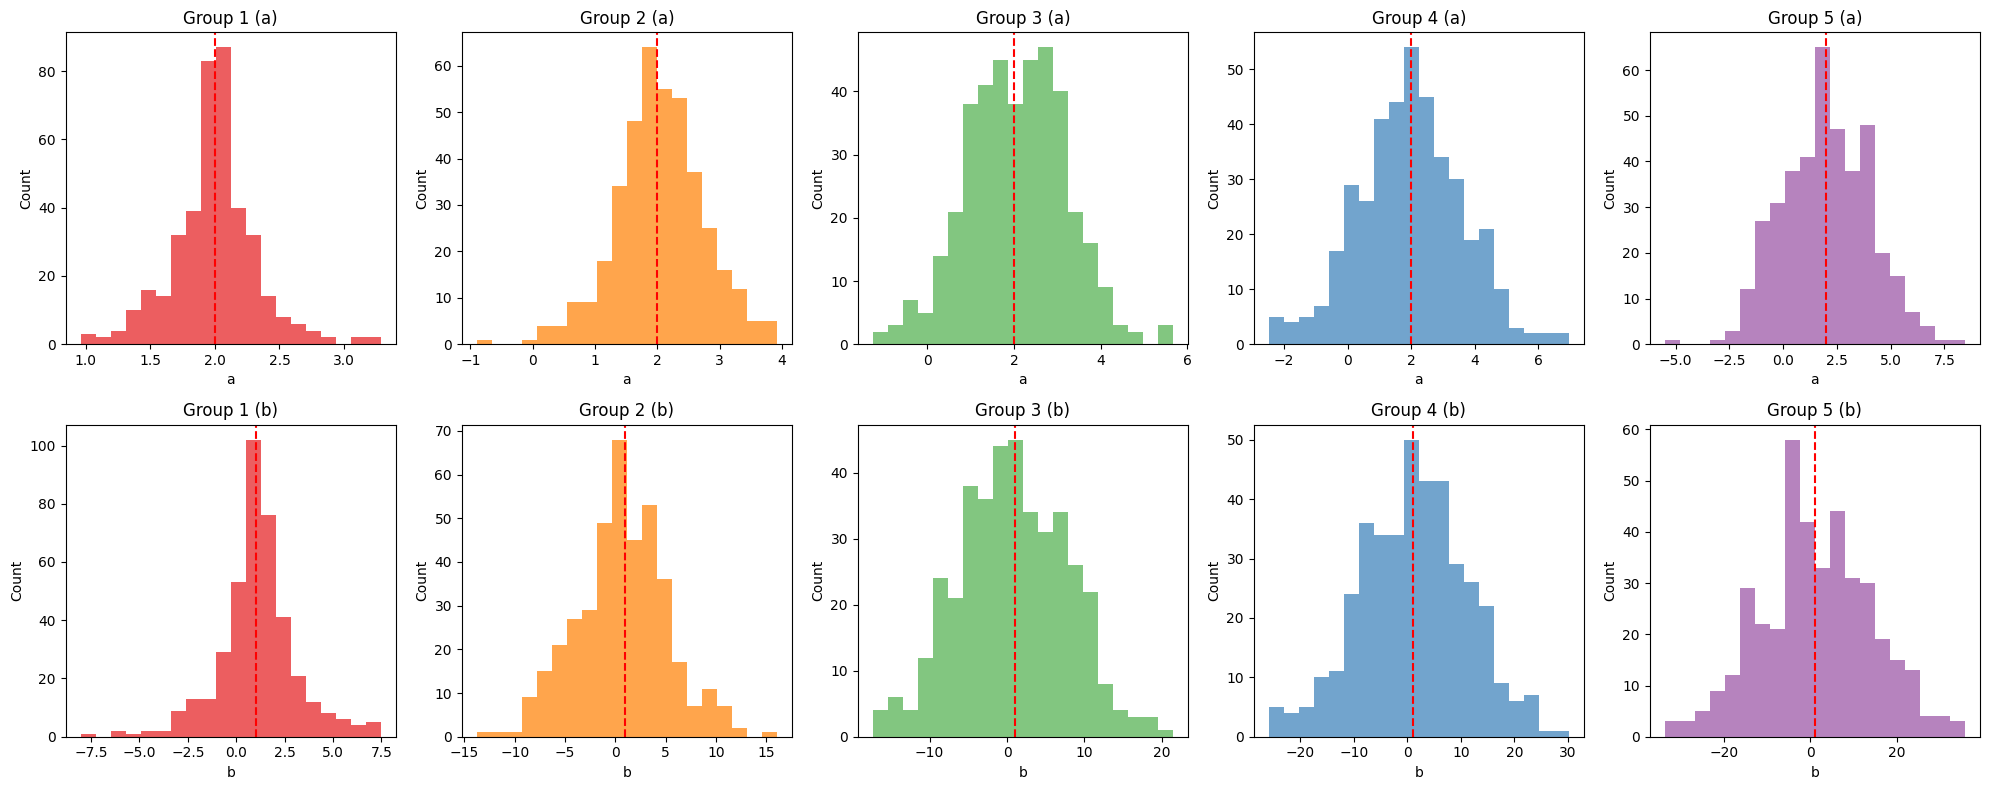

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

colors_a = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8', '#984ea3']
colors_b = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8', '#984ea3']

for i in range(5):
    axs[0, i].hist(a_groups[i], bins=20, alpha=0.7, color=colors_a[i])
    axs[0, i].axvline(true_a, color='r', linestyle='--', label='True a')
    axs[0, i].set_title(f'Group {i+1} (a)')
    axs[0, i].set_xlabel('a')
    axs[0, i].set_ylabel('Count')

    axs[1, i].hist(b_groups[i], bins=20, alpha=0.7, color=colors_b[i])
    axs[1, i].axvline(true_b, color='r', linestyle='--', label='True b')
    axs[1, i].set_title(f'Group {i+1} (b)')
    axs[1, i].set_xlabel('b')
    axs[1, i].set_ylabel('Count')

plt.tight_layout()
plt.savefig("output2_1.pdf", transparent=True)
plt.show()


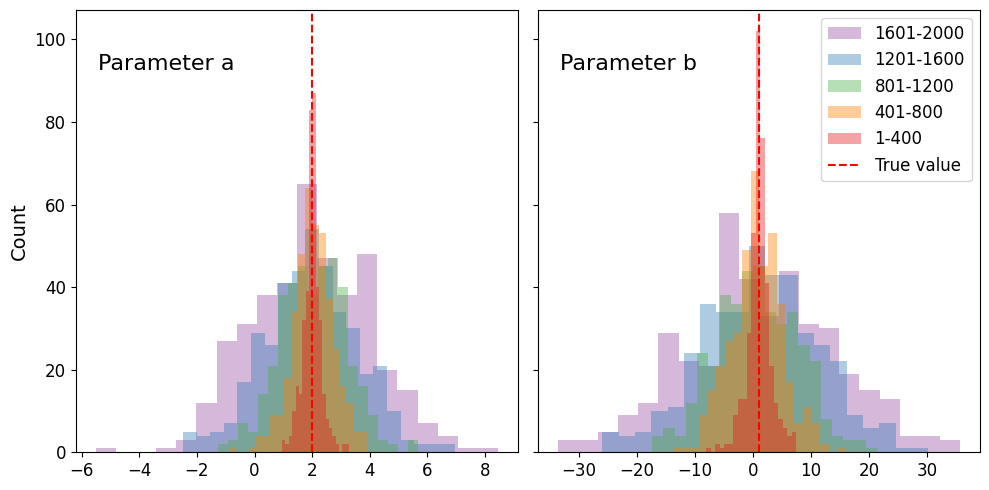

In [ ]:
#疊圖（反轉順序）
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, hspace=0, wspace=0)

legends = ['1-400', '401-800', '801-1200', '1201-1600', '1601-2000']
colors = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8', '#984ea3'] 

for i in reversed(range(5)):
    axs[0].hist(a_groups[i], bins=20, alpha=0.4, color=colors[i], label=legends[i])
    axs[1].hist(b_groups[i], bins=20, alpha=0.4, color=colors[i], label=legends[i])

axs[0].text(0.05, 0.9, "Parameter a", transform=axs[0].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left')
axs[1].text(0.05, 0.9, "Parameter b", transform=axs[1].transAxes, fontsize=16, verticalalignment='top', horizontalalignment='left')

axs[0].axvline(true_a, color='r', linestyle='--', label='True value')
axs[1].axvline(true_b, color='r', linestyle='--', label='True value')

axs[0].set_ylabel("Count", fontsize=14)
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)

plt.tight_layout()
plt.legend(loc='upper right', fontsize=12)
plt.savefig("output2_1.pdf", transparent=True)
plt.show()
